True
[[0.01 0.03 0.05 ... 0.95 0.97 0.99]
 [0.01 0.03 0.05 ... 0.95 0.97 0.99]
 [0.01 0.03 0.05 ... 0.95 0.97 0.99]
 ...
 [0.01 0.03 0.05 ... 0.95 0.97 0.99]
 [0.01 0.03 0.05 ... 0.95 0.97 0.99]
 [0.01 0.03 0.05 ... 0.95 0.97 0.99]]
[[0.003 0.003 0.003 ... 0.003 0.003 0.003]
 [0.009 0.009 0.009 ... 0.009 0.009 0.009]
 [0.015 0.015 0.015 ... 0.015 0.015 0.015]
 ...
 [0.285 0.285 0.285 ... 0.285 0.285 0.285]
 [0.291 0.291 0.291 ... 0.291 0.291 0.291]
 [0.297 0.297 0.297 ... 0.297 0.297 0.297]]
[[0.00261054 0.00451648 0.00584006 ... 0.03470303 0.03605229 0.03794235]
 [0.00518026 0.00600995 0.0068204  ... 0.03373289 0.03455352 0.03533752]
 [0.00721103 0.00726316 0.00778004 ... 0.03277844 0.03329404 0.03334998]
 ...
 [0.02943084 0.02946445 0.02948331 ... 0.01105534 0.01107428 0.01110724]
 [0.02988013 0.02991652 0.02994062 ... 0.01059743 0.01062144 0.01065784]
 [0.03033177 0.03037188 0.03040456 ... 0.0101329  0.01016528 0.01020584]]


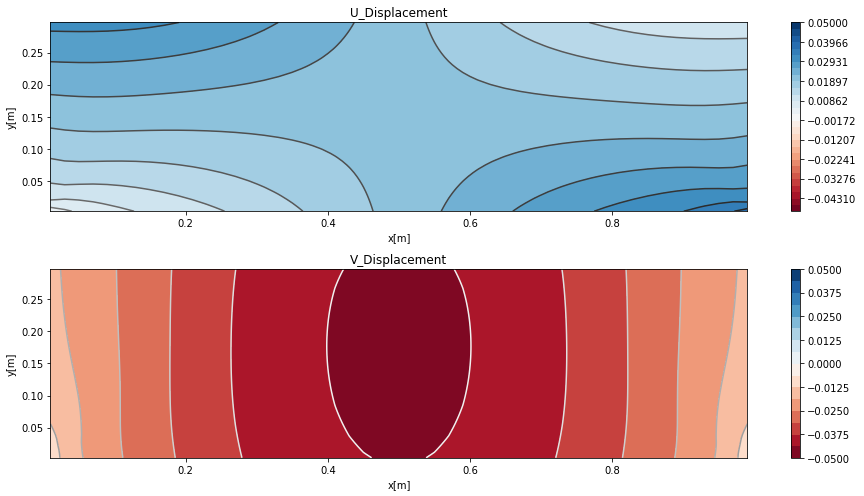

In [4]:
import numpy as np
import matplotlib.pyplot as plt

with open('data.txt','r') as f:
    a = np.loadtxt(f ,comments='%')
   
x = np.unique(a[:,0])
y = np.unique(a[:,1])

x_spacings_all = np.diff(x)
y_spacings_all = np.diff(y)

x_spacing = x_spacings_all[0]
y_spacing = y_spacings_all[0]
print(np.allclose(x_spacing,x_spacings_all))

xx,yy = np.meshgrid(x,y)

u = np.zeros_like(xx)
v = np.zeros_like(xx)
print(xx)
print(yy)
for column in a:
    x_middle = column[0] - x_spacing/2
    y_middle = column[1] - y_spacing/2
    u_value  = column[2]
    v_value  = column[3]
    i = int(x_middle/x_spacing)
    j = int(y_middle/y_spacing)
    u[j,i] = u_value
    v[j,i] = v_value
print(u)    
fig,ax = plt.subplots(nrows=2,figsize=(13,7))
c=ax[0].contourf(xx,yy,u,cmap='RdBu',levels = np.linspace(-5e-2, 5e-2, 30))
ax[0].contour(xx,yy,u,cmap='gray_r',levels = np.linspace(-5e-2, 5e-2, 30))
ax[0].set(xlabel='x[m]',ylabel='y[m]',title='U_Displacement')
plt.colorbar(c,ax=ax[0])
d=ax[1].contourf(xx,yy,v,cmap='RdBu',levels = np.linspace(-5e-2, 5e-2, 17))
ax[1].contour(xx,yy,v,cmap='gray_r',levels = np.linspace(-5e-2, 5e-2, 17))
ax[1].set(xlabel='x[m]',ylabel='y[m]',title='V_Displacement')
plt.colorbar(d,ax=ax[1])
plt.tight_layout()   
    